## Topic 2: Models - Part 2

---

In [1]:
#Optimization.
import scipy.optimize as so

#This is the link to scipy function https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

import numpy as np #import the correct packages
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0.0, 21.0, 1.0) #setting up the x values

y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size) #setting up the y values

x, y #calling them

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 array([ 10.69678712,  19.94141001,  20.11617787,  21.83114968,
         22.40339887,  35.15341172,  37.01863373,  47.46647762,
         48.30593796,  53.65732908,  64.23523976,  67.70350323,
         74.69431243,  73.29179142,  76.95272147,  95.34126955,
         83.2656441 , 106.04420424, 109.82492524,  97.9240995 ,
        111.22347816]))

In [3]:
#We need to minimize the cost function. 
#The scipy function needs one argument but we have two values (m, c) so we create a new list called MC. 


def cost(MC):
  
    m, c = MC
    
    cost = np.sum((y - m * x - c)**2) #from the formula Big sigma = sum, x and y are fixed values. 
    
    return cost # Return that value.

In [4]:
cost((5.0, 10.0)) #check the values for cost

594.1836196834176

In [5]:
result = so.minimize(cost, (2.0, 2.0)) #we need to add two guesses so we choose 2 for m and 2 for c

result #calling the results

      fun: 556.8064683010634
 hess_inv: array([[ 0.00064975, -0.0064989 ],
       [-0.0064989 ,  0.08881708]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([5.17457196, 9.06818059])

###### The min number is fun: 


In [6]:
m_o, c_o = result.x #m optimized and c optimixed values

m_o, c_o #calling the m_o, c_o

(5.174571964098474, 9.068180587238794)

In [7]:
m_a, c_a = np.polyfit(x, y, 1) #Here is the previous analytical result from part 1 calling them m_a and c_a

m_a, c_a #calling the m_a, c_a

(5.174572016452179, 9.068179967050986)

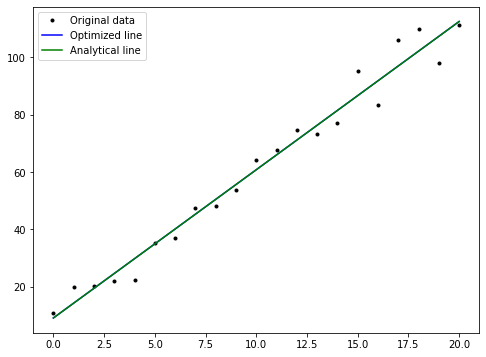

In [8]:
fig, ax = plt.subplots(figsize=(8, 6)) #setting the size of the plot
ax.plot(x, y, 'k.', label='Original data') #setting up the orignal data
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line') #setting up the opt line
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')#setting up the analy line
ax.legend() #create a legend for both opt and analy line


plt.show() #Show the plot.

##### The Blue and Green line are identical so you cant see the blue line. Therefore the Optimized line is equal to the Analytical line and vice versa. 

## Curve Fitting 

---

In [9]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def f(x, m, c): # Setting up the model function. 
    return m * x + c

In [10]:
result = so.curve_fit(f, x, y) #setting up the curve fit for f, x, y

In [11]:
result #calling the results

(array([5.17457202, 9.06817997]),
 array([[ 0.03805923, -0.38059226],
        [-0.38059226,  5.20142757]]))

In [12]:
m_f, c_f = result[0] #setting up the parameters

m_f, c_f #calling the new m and c 

(5.174572016183865, 9.068179970717939)

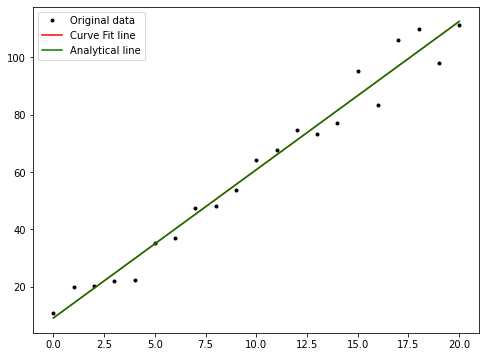

In [13]:
fig, ax = plt.subplots(figsize=(8, 6)) #setting up the fig size
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line') #red line
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line') #green line
ax.legend()


plt.show() #requesting the plot

#### Both the red and green lines are again identical. 

## Excercise 2 


#### Fit a straight line to the following data points, using all three methods used above.

#### Do you think a straight line is a good model for these points?


---

In [14]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

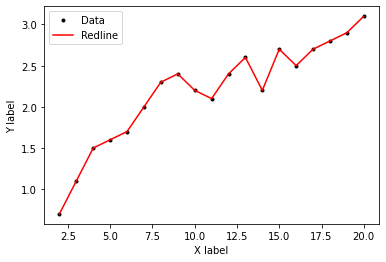

In [15]:
plt.plot(x, y, 'k.', label="Data")
plt.plot(x, y, 'r-', label=r"Redline")

plt.legend()

plt.xlabel('X label')
plt.ylabel('Y label')

plt.show()

## First Method: Best Fit Model

---

In [16]:
#Changing List to a numpy array for x and y
x = np.array(x)
y = np.array(y)

In [17]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from w and d.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


In [18]:
np.polyfit(x, y, 1)


array([0.10315789, 1.04947368])

In [19]:
print(type(x))

<class 'numpy.ndarray'>


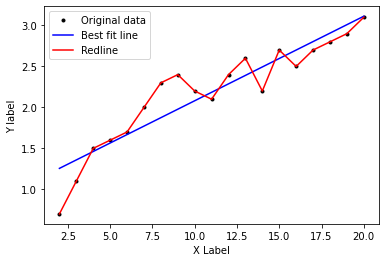

In [20]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')
plt.plot(x, y, 'r-', label=r"Redline")

# Add axis labels and a legend.
plt.xlabel('X Label')
plt.ylabel('Y label')
plt.legend()

# Show the plot.
plt.show()

## Second Method: Optimisation Model

---

In [21]:
def cost(MC):
    m, c = MC
    cost = np.sum((y - m * x - c)**2)
    return cost

In [22]:
cost((5.0,10.0))

88639.75

In [23]:
result = so.minimize(cost, (2.0, 2.0))
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [24]:
m_o, c_o = result.x
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

In [25]:
m_a, c_a = np.polyfit(x, y, 1)

m_a, c_a

(0.10315789473684217, 1.0494736842105254)

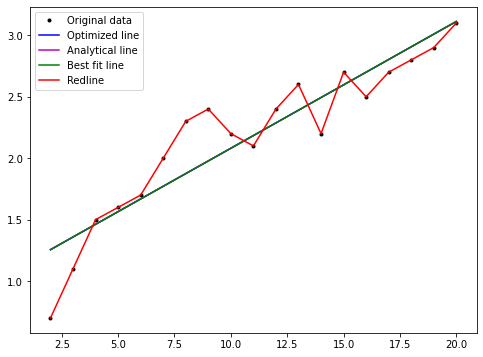

In [26]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'm-', label='Analytical line')
plt.plot(x, m * x + c, 'g-', label='Best fit line')
plt.plot(x, y, 'r-', label=r"Redline")
ax.legend()

# Show the plot.
plt.show()

## Third Method: Curve Fitting Model

---

In [27]:
def f(x, m, c):
    return m * x + c

In [28]:
result = so.curve_fit(f, x, y)

In [29]:
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [30]:
m_f, c_f = result[0]

m_f, c_f

(0.10315789458399933, 1.0494736859688867)

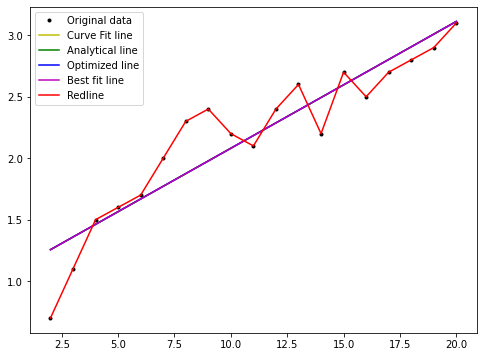

In [31]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'y-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
plt.plot(x, m * x + c, 'm-', label='Best fit line')
plt.plot(x, y, 'r-', label=r"Redline")
ax.legend()

# Show the plot.
plt.show()

## *Do you think a straight line is a good model for these points?*

#### No I wouldnt use a straight line for these data points as they vary to much above and below the line. The cost would be high for these data points. 